In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LinearRegression
from ipywidgets import interact
import ipywidgets as widgets



In [11]:
clfn_data = pd.read_csv('classification.csv')
reg1_data = pd.read_csv('regression_1.csv')
reg2_data = pd.read_csv('regression_2.csv')


<Axes: xlabel='x1', ylabel='x2'>

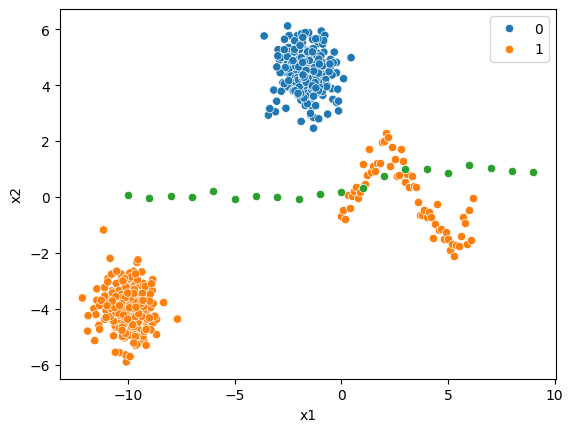

In [12]:
sns.scatterplot(data=clfn_data,x = clfn_data['x1'], y = clfn_data['x2'], hue='label'  )
sns.scatterplot(data=reg1_data,x = reg1_data['x1'], y = reg1_data['x2'])
sns.scatterplot(data=clfn_data,x = reg2_data['x1'], y = reg2_data['x2'])


Classification

In [13]:
X, y = np.c_[clfn_data['x1'], clfn_data['x2']], clfn_data.label
print(np.unique(y))

[0 1]


(0.0, 6.0)

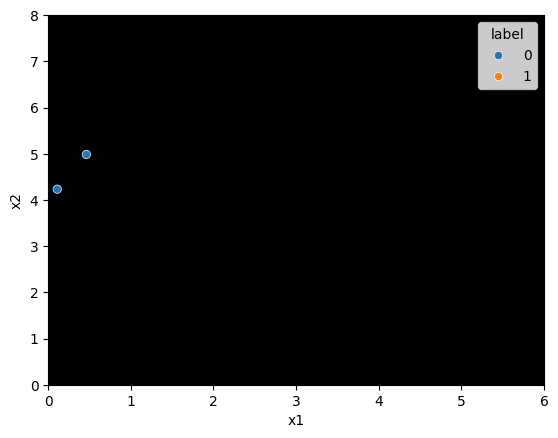

In [14]:
##KNN attempt
n_neighbors = 3
weights = ['uniform', 'distance']
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

kNN = KNeighborsClassifier(n_neighbors, weights=weights[1])
kNN.fit(X, y)

xx, yy = np.meshgrid(np.arange(-10, 10, 0.02),
                     np.arange(-10, 10, 0.02))
Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='gray')

# Plot also the training points
sns.scatterplot(data=clfn_data, x='x1', y='x2', hue='label')
plt.ylim([0, 8])
plt.xlim([0, 6])


<Axes: >

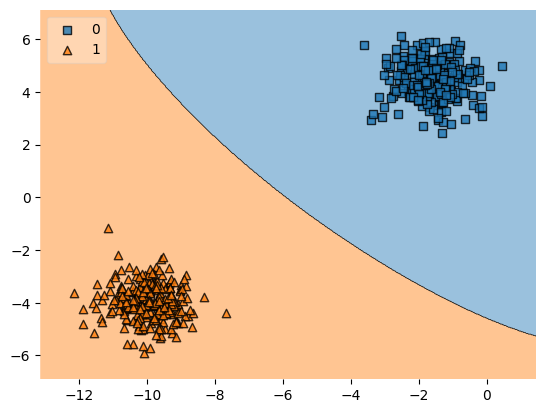

In [15]:
X, y = np.c_[clfn_data['x1'], clfn_data['x2']], clfn_data.label
print(np.unique(y))
svm = SVC(degree=2)
svm.fit(X,y)
plot_decision_regions(X, np.asarray(y), clf=svm, legend=2)


Regression on Reg1,2 data

Interact command

In [76]:
def quad(x ,a,A,b):
    return A*np.sin(a*x+b)
x = np.arange(-10,10, 0.001)

@interact(a=(-10,10, 0.001), A = (-10,10, 0.001), b=(-10,10, 0.001))
def plotline(a=1.028e+00, A=-1.559e+00, b=-3.702e+00):
    line = quad(x, a, A,b)
    plt.plot(x, line)
    sns.scatterplot(data=reg1_data,x = reg1_data['x1'], y = reg1_data['x2'], color='red')
    plt.xlim([-1,8])
    plt.ylim([-3,3])

    

interactive(children=(FloatSlider(value=1.028, description='a', max=10.0, min=-10.0, step=0.001), FloatSlider(…

#1 Curve fitting(error)

In [ ]:
from scipy.optimize import curve_fit

values = curve_fit(quad, X, y)
print(values) 
x = np.arange(-5, 5.0, 0.1)
y_fit = quad(x, *values,_)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data=reg1_data,x = reg1_data['x1'], y = reg1_data['x2'])
plt.xlim([-5,10])
plt.ylim([-3,3])


#2 Minimizing quad()

In [25]:
from scipy.optimize import minimize

def helper(values, x, y):
    return ((y-quad(x, *values))**2).sum()


In [32]:
X = np.asarray(reg1_data['x1'])
y = reg1_data['x2']
m = minimize(helper, [0,0,1], args=(X,y))
m


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.17774595983699
        x: [ 1.028e+00 -1.559e+00 -3.702e+00]
      nit: 18
      jac: [ 2.384e-07  0.000e+00 -1.192e-07]
 hess_inv: [[ 1.893e-03 -7.557e-04 -5.137e-03]
            [-7.557e-04  1.641e-02  1.777e-03]
            [-5.137e-03  1.777e-03  2.038e-02]]
     nfev: 148
     njev: 37

In [58]:
from scipy.optimize import minimize

def quad_2(x,m,c):
    return m*x + c

def helper(values, x, y):
    return ((y-quad_2(x, *values))**2).sum()


X = np.asarray(reg2_data['x1'])
y = reg2_data['x2']
m = minimize(helper, [0,0], args=(X,y))
m


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.9502772433548298
        x: [ 6.778e-02  4.503e-01]
      nit: 3
      jac: [ 7.451e-08  2.235e-08]
 hess_inv: [[ 7.519e-04  3.759e-04]
            [ 3.759e-04  2.519e-02]]
     nfev: 15
     njev: 5

In [60]:
@interact(m=(-10,10, 0.001), c = (-10,10, 0.001))
def plotline(m = 6.778e-02, c = 4.503e-01):
    line = quad_2(x, m,c)
    plt.plot(x, line)
    sns.scatterplot(data=reg2_data,x = reg2_data['x1'], y = reg2_data['x2'], color='red')
    plt.xlim([-15,15])
    plt.ylim([-0.5,1.5])

interactive(children=(FloatSlider(value=0.06778, description='m', max=10.0, min=-10.0, step=0.001), FloatSlide…

In [73]:
def quadddd(x,c,d,e,f):
    return  c*(x*x*x)+d*(x*x)+e*x+f
x = np.arange(-10,10, 0.001)

@interact(c=(-10,10, 0.001), 
          d=(-10,10, 0.001), e=(-10,10, 0.001), f=(-10,10, 0.001))
# def plotline(a=1,b=1,c=1,d=1,e=1,f=1):
def plotline(c=1.317e-01, d=-1.400e+00,  e=3.712e+00, f=-1.413e+00):

    line = quadddd(x,c,d,e,f)
    plt.plot(x, line)
    sns.scatterplot(data=reg2_data,x = reg2_data['x1'], y = reg2_data['x2'], color='red')
    plt.xlim([-15,15])
    plt.ylim([-0.5,1.5])

interactive(children=(FloatSlider(value=0.1317, description='c', max=10.0, min=-10.0, step=0.001), FloatSlider…

In [74]:
from scipy.optimize import minimize

def helper(values, x, y):
    return ((y-quadddd(x, *values))**2).sum()

X = np.asarray(reg1_data['x1'])
y = reg1_data['x2']
m = minimize(helper, [1,1,1,1], args=(X,y))
m

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 12.141156177761737
        x: [ 1.317e-01 -1.400e+00  3.712e+00 -1.413e+00]
      nit: 12
      jac: [ 2.384e-07 -1.192e-06 -3.576e-07 -1.192e-07]
 hess_inv: [[ 3.569e-04 -3.319e-03  8.166e-03 -4.049e-03]
            [-3.319e-03  3.177e-02 -8.157e-02  4.338e-02]
            [ 8.166e-03 -8.157e-02  2.241e-01 -1.356e-01]
            [-4.049e-03  4.338e-02 -1.356e-01  1.130e-01]]
     nfev: 80
     njev: 16